ℓ1-Spline
=========

This example demonstrates the use of class [spline.SplineL1](http://sporco.rtfd.org/en/latest/sporco.admm.spline.html#sporco.admm.spline.SplineL1) for removing salt & pepper noise from a greyscale image using ℓ1-spline fitting.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco.admm import spline
from sporco import util
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672], gray=True)

Construct test image corrupted by 20% salt & pepper noise.

In [3]:
np.random.seed(12345)
imgn = util.spnoise(img, 0.2)

Set regularization parameter and options for ℓ1-spline solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 5.0
opt = spline.SplineL1.Options({'Verbose': True, 'gEvalY': False})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
b = spline.SplineL1(imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      Reg       r         s         ρ         
----------------------------------------------------------------
   0  4.14e+04  3.24e+04  1.80e+03  2.19e-01  3.80e+00  1.01e+01
   1  3.53e+04  3.36e+04  3.41e+02  1.15e-01  1.98e+00  1.01e+01
   2  3.89e+04  3.69e+04  4.08e+02  1.35e-01  3.57e-01  2.44e+00
   3  3.52e+04  3.36e+04  3.23e+02  1.05e-01  2.33e-01  1.50e+00
   4  3.32e+04  3.15e+04  3.25e+02  8.04e-02  1.21e-01  1.01e+00


   5  3.35e+04  3.19e+04  3.14e+02  6.72e-02  6.56e-02  8.20e-01
   6  3.22e+04  3.06e+04  3.16e+02  4.97e-02  5.36e-02  8.20e-01
   7  3.11e+04  2.95e+04  3.15e+02  3.69e-02  4.17e-02  8.20e-01
   8  3.09e+04  2.93e+04  3.15e+02  2.94e-02  2.84e-02  8.20e-01
   9  3.05e+04  2.90e+04  3.12e+02  2.31e-02  2.31e-02  8.20e-01
  10  3.02e+04  2.86e+04  3.14e+02  1.86e-02  1.82e-02  8.20e-01
  11  3.01e+04  2.85e+04  3.12e+02  1.56e-02  1.32e-02  8.20e-01
  12  2.99e+04  2.84e+04  3.13e+02  1.33e-02  1.06e-02  8.20e-01


  13  2.98e+04  2.83e+04  3.12e+02  1.14e-02  9.09e-03  9.16e-01
  14  2.98e+04  2.82e+04  3.12e+02  1.02e-02  7.41e-03  1.02e+00
  15  2.97e+04  2.82e+04  3.12e+02  9.12e-03  6.83e-03  1.20e+00
  16  2.97e+04  2.81e+04  3.12e+02  8.38e-03  6.08e-03  1.39e+00
  17  2.97e+04  2.81e+04  3.12e+02  7.72e-03  5.46e-03  1.63e+00
  18  2.96e+04  2.81e+04  3.12e+02  7.13e-03  5.33e-03  1.94e+00
  19  2.96e+04  2.80e+04  3.12e+02  6.57e-03  4.92e-03  2.24e+00
  20  2.96e+04  2.80e+04  3.12e+02  6.06e-03  4.84e-03  2.59e+00


  21  2.95e+04  2.80e+04  3.12e+02  5.55e-03  4.53e-03  2.90e+00
  22  2.95e+04  2.80e+04  3.13e+02  5.08e-03  4.33e-03  3.21e+00
  23  2.95e+04  2.79e+04  3.13e+02  4.66e-03  3.69e-03  3.21e+00
  24  2.95e+04  2.79e+04  3.14e+02  4.27e-03  3.71e-03  3.61e+00
  25  2.95e+04  2.79e+04  3.14e+02  3.92e-03  3.27e-03  3.61e+00
  26  2.95e+04  2.79e+04  3.15e+02  3.60e-03  2.92e-03  3.61e+00
  27  2.94e+04  2.79e+04  3.16e+02  3.31e-03  2.84e-03  4.01e+00


  28  2.94e+04  2.78e+04  3.16e+02  3.05e-03  2.60e-03  4.01e+00
  29  2.94e+04  2.78e+04  3.17e+02  2.81e-03  2.31e-03  4.01e+00
  30  2.94e+04  2.78e+04  3.18e+02  2.58e-03  2.29e-03  4.42e+00
  31  2.94e+04  2.78e+04  3.18e+02  2.38e-03  2.02e-03  4.42e+00
  32  2.94e+04  2.78e+04  3.19e+02  2.19e-03  1.83e-03  4.42e+00
  33  2.94e+04  2.78e+04  3.19e+02  2.03e-03  1.59e-03  4.42e+00
  34  2.94e+04  2.78e+04  3.20e+02  1.87e-03  1.61e-03  5.00e+00
  35  2.94e+04  2.78e+04  3.20e+02  1.72e-03  1.49e-03  5.00e+00


  36  2.94e+04  2.78e+04  3.21e+02  1.59e-03  1.30e-03  5.00e+00
  37  2.94e+04  2.78e+04  3.21e+02  1.46e-03  1.30e-03  5.53e+00
  38  2.94e+04  2.77e+04  3.22e+02  1.34e-03  1.18e-03  5.53e+00
  39  2.94e+04  2.77e+04  3.22e+02  1.24e-03  1.05e-03  5.53e+00
  40  2.93e+04  2.77e+04  3.22e+02  1.14e-03  9.51e-04  5.53e+00
  41  2.93e+04  2.77e+04  3.23e+02  1.05e-03  9.54e-04  6.06e+00
  42  2.93e+04  2.77e+04  3.23e+02  9.66e-04  8.27e-04  6.06e+00
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("SplineL1 solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

SplineL1 solve time:  1.23 s
Noisy image PSNR:    11.58 dB
Denoised image PSNR: 27.60 dB


Display reference, corrupted, and denoised images.

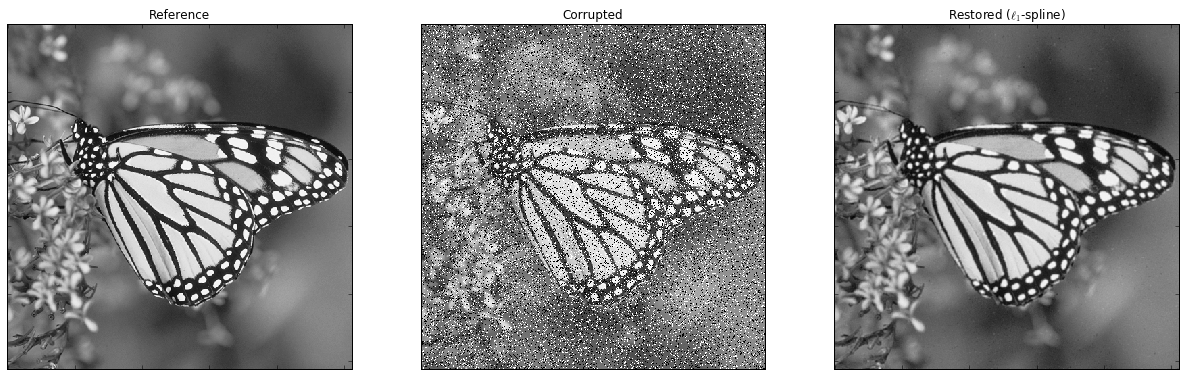

In [7]:
fig = plot.figure(figsize=(21, 7))
plot.subplot(1, 3, 1)
plot.imview(img, fgrf=fig, title='Reference')
plot.subplot(1, 3, 2)
plot.imview(imgn, fgrf=fig, title='Corrupted')
plot.subplot(1, 3, 3)
plot.imview(imgr, fgrf=fig, title=r'Restored ($\ell_1$-spline)')
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

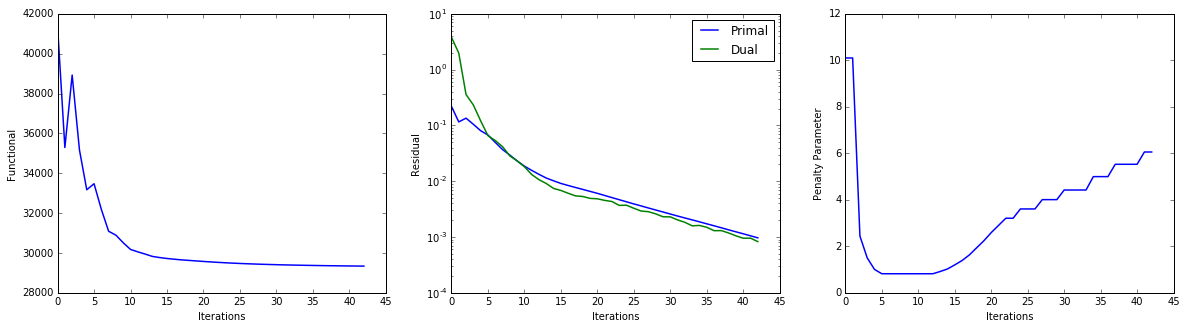

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, fgrf=fig, xlbl='Iterations', ylbl='Functional')
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T, fgrf=fig,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'])
plot.subplot(1, 3, 3)
plot.plot(its.Rho, fgrf=fig, xlbl='Iterations', ylbl='Penalty Parameter')
fig.show()